# Part 1: Preprocessing

In [1]:
import string

text = ""

for filename in ['bible.txt', 'quran.txt']:
    with open(filename, 'r', encoding = 'utf-8') as file:
        text += file.read() + ' '

# Case folding
text = text.lower()

# Tokenization
def tokenizer(text):
    text = text.translate(str.maketrans('','',string.punctuation))
    token = text.split()
    return token

tokens = tokenizer(text)

In [2]:
# Calculate term frequency
term_freq = {}
for term in tokens:
    if term in term_freq:
        term_freq[term] += 1
    else:
        term_freq[term] = 1

term_freq

{'\ufeffthe': 1,
 'project': 83,
 'gutenberg': 26,
 'ebook': 13,
 'of': 38509,
 'the': 72143,
 'king': 2277,
 'james': 52,
 'version': 7,
 'bible': 9,
 'this': 3350,
 'is': 9840,
 'for': 10699,
 'use': 48,
 'anyone': 27,
 'anywhere': 2,
 'in': 14958,
 'united': 23,
 'states': 19,
 'and': 57540,
 'most': 350,
 'other': 744,
 'parts': 75,
 'world': 343,
 'at': 1745,
 'no': 1917,
 'cost': 7,
 'with': 7215,
 'almost': 19,
 'restrictions': 2,
 'whatsoever': 165,
 'you': 7073,
 'may': 1121,
 'copy': 21,
 'it': 7760,
 'give': 1081,
 'away': 1110,
 'or': 1667,
 'reuse': 2,
 'under': 408,
 'terms': 24,
 'license': 17,
 'included': 3,
 'online': 4,
 'wwwgutenbergorg': 5,
 'if': 2336,
 'are': 4352,
 'not': 8277,
 'located': 7,
 'will': 5392,
 'have': 5285,
 'to': 17242,
 'check': 5,
 'laws': 31,
 'country': 188,
 'where': 453,
 'before': 2147,
 'using': 9,
 'title': 4,
 'release': 26,
 'date': 7,
 'august': 1,
 '1': 4,
 '1989': 2,
 '10': 1,
 'recently': 1,
 'updated': 2,
 '2023': 17,
 'language':

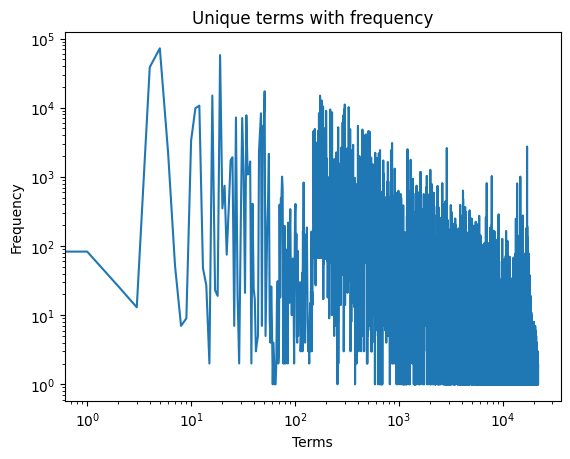

In [3]:
import matplotlib.pyplot as plt

plt.plot(term_freq.keys(), term_freq.values())
plt.title("Unique terms with frequency")
plt.xlabel("Terms")
plt.ylabel("Frequency")

plt.loglog()
plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

# Stopping - Remove English stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = []
for word in tokens:
    if word not in stop_words:
        filtered_tokens.append(word)

# Normalization - Perform Porter stemming
porter = PorterStemmer()
stemmed_tokens = []
for word in filtered_tokens:
    stemmed_tokens.append(porter.stem(word))
    
print(stemmed_tokens[:200])

In [ ]:
# Save preprocessed tokens to new files
with open('bible_preprocessed.txt', 'w', encoding='utf-8') as bible_file:
    bible_file.write(" ".join(stemmed_tokens))

with open('quran_preprocessed.txt', 'w', encoding='utf-8') as quran_file:
    quran_file.write(" ".join(stemmed_tokens))

Compare the processed file to the new file. Are there any surprises? Discuss
what kind of modifications in preprocessing could be applied. For example:
- Additional words/terms to be filtered out
- Special tokenization
- Additional normalization to some terms

In [9]:
example = "politician: politicians, politics policy"
tokensEx = tokenizer(example)
tokensEx

['politician', 'politicians', 'politics', 'policy']

# Part 2: Text Laws

In [4]:
import matplotlib.pyplot as plt

# Calculate term frequency
term_freq = {}
for term in stemmed_tokens:
    if term in term_freq:
        term_freq[term] += 1
    else:
        term_freq[term] = 1